In [38]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
np.random.seed(1)

Read in the data from the csv's

In [39]:
# Begrenzt die eingelesenen Daten aif 500 Zeilen (Geschwindigkeit)
train_data = pd.read_csv('fraud/fraudTrain.csv', delimiter=',', nrows = 2500)
train_data.dataframeName = 'fraudTrain.csv'
test_data = pd.read_csv('fraud/fraudTest.csv', delimiter=',', nrows = 50)
test_data.dataframeName = 'fraudTest.csv'

To get to know the data we're dealing with, we will first use the head function to look at its columns and its values. It consists of various columns specifying the transaction (date, credit card number, transaction number, etc.) and columns for the characteristical values of the merchant, such as name, job, gender and detailled geographical information. A binary value determines if the transaction was a fraud.

In [40]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


We first need to explore the data to determine which method of classification to use. We will conduct this exploration on the entirety of our data, therefore concatenating our two dataframes. The info() function gives us information on the used data types.

In [41]:
combined_df = pd.concat([train_data, test_data])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2550 entries, 0 to 49
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2550 non-null   int64  
 1   trans_date_trans_time  2550 non-null   object 
 2   cc_num                 2550 non-null   int64  
 3   merchant               2550 non-null   object 
 4   category               2550 non-null   object 
 5   amt                    2550 non-null   float64
 6   first                  2550 non-null   object 
 7   last                   2550 non-null   object 
 8   gender                 2550 non-null   object 
 9   street                 2550 non-null   object 
 10  city                   2550 non-null   object 
 11  state                  2550 non-null   object 
 12  zip                    2550 non-null   int64  
 13  lat                    2550 non-null   float64
 14  long                   2550 non-null   float64
 15  city_p

Checking for null values reveals that we are working with sanitized data and no missing values anywhere.

In [42]:
combined_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

The shape command shows that we have 1852394 rows and 23 columns in both of our data sets combined.

In [43]:
combined_df.shape

(2550, 23)

We will first start by wrangling the data to normalise information such as dates. We can also expand the data by extracting additional time information such as week and hour.

In [44]:
train_data['trans_date_trans_time'] = pd.to_datetime(train_data['trans_date_trans_time'])
test_data['trans_date_trans_time'] = pd.to_datetime(test_data['trans_date_trans_time'])

train_data['year'] = train_data['trans_date_trans_time'].dt.year
test_data['year'] = test_data['trans_date_trans_time'].dt.year

train_data['month'] = train_data['trans_date_trans_time'].dt.month
test_data['month'] = test_data['trans_date_trans_time'].dt.month

train_data['week'] = train_data['trans_date_trans_time'].dt.isocalendar().week
test_data['week'] = test_data['trans_date_trans_time'].dt.isocalendar().week

train_data['day'] = train_data['trans_date_trans_time'].dt.day_name()
test_data['day'] = test_data['trans_date_trans_time'].dt.day_name()

train_data['hour'] = train_data['trans_date_trans_time'].dt.hour
test_data['hour'] = test_data['trans_date_trans_time'].dt.hour

combined_df = pd.concat([train_data, test_data])

In [66]:
# TODO: alle diese drops rechtfertigen und raw_features umbenennen, weil falsch
raw_features = train_data
raw_features = raw_features.drop('lat', axis = 1)
raw_features = raw_features.drop('long', axis = 1)
raw_features = raw_features.drop('city_pop', axis = 1)
raw_features = raw_features.drop('trans_num', axis = 1)
raw_features = raw_features.drop('unix_time', axis = 1)
raw_features = raw_features.drop('merch_lat', axis = 1)
raw_features = raw_features.drop('merch_long', axis = 1)
raw_features = raw_features.drop('street', axis = 1)
raw_features = raw_features.drop('cc_num', axis = 1)
raw_features = raw_features.drop('zip', axis = 1)
raw_features = raw_features.drop('city', axis = 1)
raw_features = raw_features.drop('first', axis = 1)
raw_features = raw_features.drop('last', axis = 1)
raw_features = raw_features.drop('trans_date_trans_time', axis = 1)
raw_features = raw_features.drop('year', axis = 1)
raw_features = raw_features.drop('month', axis = 1)
raw_features = raw_features.drop('dob', axis = 1)
raw_features = raw_features.drop('day', axis = 1)
raw_features = raw_features.drop('week', axis = 1)

# andere Darstellung?
raw_features = raw_features.drop('merchant', axis = 1)
raw_features = raw_features.drop('job', axis = 1)
raw_features = raw_features.drop('state', axis = 1)


In [67]:
non_fraud_df = raw_features[raw_features.is_fraud == 0]
fraud_df = raw_features[raw_features.is_fraud == 1]
#oversampling here
cnt = len(non_fraud_df)
oversampled_fraud = fraud_df.sample(cnt, replace=True)
oversampled_train_df = pd.concat([non_fraud_df, oversampled_fraud])
oversampled_train_df.head()

# drop dependent variable
y = oversampled_train_df['is_fraud']
X = oversampled_train_df.drop('is_fraud', axis = 1)
X.head()

,Unnamed: 0,category,amt,gender,hour
0,0,misc_net,4.97,F,0
1,1,grocery_pos,107.23,F,0
2,2,entertainment,220.11,M,0
3,3,gas_transport,45.00,M,0
4,4,misc_pos,41.96,M,0


In [68]:


# TODO vielleicht namen droppen? oder Wiederholungstaeter behalten? Oder latency usw droppen, weil unnoetige features?
category_one_hot = pd.get_dummies(X.category, prefix='category', drop_first=True)
X = X.drop('category', axis = 1)
gender_one_hot = pd.get_dummies(X.gender, prefix='gender', drop_first=True)
X = X.drop('gender', axis = 1)
hour_one_hot = pd.get_dummies(X.hour, prefix='hour', drop_first=True)
X = X.drop('hour', axis = 1)
#state_one_hot = pd.get_dummies(raw_features.category, prefix='state', drop_first=True)

X = pd.concat([X, gender_one_hot, category_one_hot, hour_one_hot], axis=1)

X.head()



,Unnamed: 0,amt,gender_M,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,4.97,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,107.23,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,220.11,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,45.00,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,41.96,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# cross validation
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 20)
X.head()
model.fit(X, y)

#TODO: get this working... and get test data working the same as here.

from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(X, y)

#from sklearn.model_selection import GridSearchCV



ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

By determining the percentage of fraud transactions, our dependent variable for classification, we can see that only 0,5% of all transactions are frauds in all of our data sets. This is a highly imbalanced dependent variable which can result in an inaccuracy of our training algorithm. A classification with an imbalanced dependent variable will favour the majority class, in our case "no fraud", since it always strives to achieve the best possible accuracy.

In [11]:
combined_df['is_fraud'].value_counts(normalize=True).mul(100)

0    99.478999
1     0.521001
Name: is_fraud, dtype: float64

The same command for our train data reveals that our it also has a highly imbalanced dependent variable and therefore requires balancing. We will use oversampling, since it does not dispose of any potentially useful data as undersampling does by discarding data of the majority dependent variable.

In [12]:
train_data['is_fraud'].value_counts(normalize=True).mul(100)

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64

In order to characterise fraud, we will filter for all occurences of fraud and plot the data based on various variables. The following plots showcasing frauds alone wield these results:
- Slightly more frauds were done by women than by men, though it is almost even
- grocery_pos and shopping_net are the highest fraud categories with almost twice as much as the next one, misc_net
- Most fraud takes place in very late hours leading up to midnight and the hours directly after

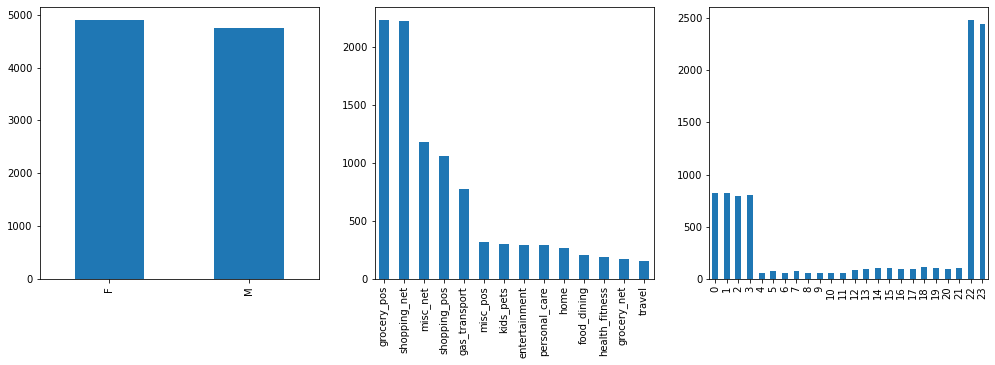

In [13]:
fraud_df = combined_df[combined_df.is_fraud == 1]
# TODO: filter this or make more analysis
fraud_df = fraud_df[['gender', 'category', 'merchant', 'city', 'state', 'job', 'week', 'hour', 'day', 'month', 'year', 'trans_date_trans_time']]
#fraud_df.groupby('category').count().plot(kind = 'bar', legend = False)
plt.figure(figsize = (17,5))
plt.subplot(131)
fraud_df['gender'].value_counts().plot(kind = 'bar')
plt.subplot(132)
fraud_df['category'].value_counts().plot(kind = 'bar')
plt.subplot(133)
fraud_df['hour'].value_counts().sort_index().plot(kind = 'bar')
#fraud_df['state'].value_counts().plot(kind = 'bar')
plt.show()

This is interesting, but we need to take a closer look at the data in total to further analyse these trends. The following code analyses fraud in relation to non-fraud cases and gender. Looking at the fraud cases alone can be misleading, which the following code highlights.

Although women have slightly more fraud cases of around 1.5%, women also have 10% more transactions (which are roughly also the non-frauds transactions, since the fraud/non-fraud ratio is so slim) in total, meaning women are buying more. With a higher transaction volume of around 10%, but an almost even fraud-ratio between men and women, we can see that it is actually men who are more likely to commit fraud by only around 0.1% when put into relation. This is a very small difference percentage, so the total ratio of fraud is roughly the same, but this debunks the previous intuition that women are more likely to commit fraud. It is important to showcase these comparisons to draw correct conclusions from our data.


In [14]:
counts_df = combined_df[['gender', 'is_fraud']].value_counts()
women_frauds = counts_df[('F', 1)]
men_frauds = counts_df[('M', 1)]

women_non_frauds = counts_df[('F', 0)]
men_non_frauds = counts_df[('M', 0)]
total_frauds = women_frauds + men_frauds
total_non_frauds = women_non_frauds + men_non_frauds
total_women = women_frauds + women_non_frauds
total_men = men_frauds + men_non_frauds
print('Total transaction ratio: Women (%.2f%%), Men (%.2f%%)'
      % (total_women * 100 / (total_frauds + total_non_frauds), total_men * 100 / (total_frauds + total_non_frauds)))
print('Total non-fraud transaction ratio: Women (%.2f%%), Men (%.2f%%)'
      % (women_non_frauds * 100 / total_non_frauds, men_non_frauds * 100 / total_non_frauds))
print('Total fraud transaction ratio: Women (%.2f%%), Men (%.2f%%)'
      % (women_frauds * 100 / total_frauds, men_frauds * 100 / total_frauds))
print('Women fraud transaction ratio: Frauds (%.2f%%)'
      % (women_frauds * 100 / (total_women)))
print('Men fraud transaction ratio: Frauds (%.2f%%)'
      % (men_frauds * 100 / (total_men)))

Total transaction ratio: Women (54.78%), Men (45.22%)
Total non-fraud transaction ratio: Women (54.80%), Men (45.20%)
Total fraud transaction ratio: Women (50.76%), Men (49.24%)
Women fraud transaction ratio: Frauds (0.48%)
Men fraud transaction ratio: Frauds (0.57%)


In [15]:
def plot_double_bar(fraud_df, non_fraud_df, category):
    non_fraud = non_fraud_df[category].value_counts().sort_index()
    fraud = fraud_df[category].value_counts().sort_index()
    index = fraud.index.to_list()
    #ax = pd.DataFrame({'fraud_cases': fraud, 'non_fraud_cases': non_fraud}, index=index).plot(kind = "bar")
    ax = pd.DataFrame({'fraud_cases': fraud, 'non_fraud_cases': non_fraud}, index=index).plot(kind = "bar", figsize = (15, 8))
    ax.set_yscale('log')

The following plot with a logarithmic y-axis shows us the fraud and non-fraud cases per hour. We can see that all hours from 0-11 and from 12-23 have roughly the same amount of non-fraud cases. It therefore shows a rather balanced transaction behaviour with less cases in the first half of the day and more in the latter. The fraud data still shows the significant spikes that we also determined in the plots from before.

But it is very interesting in this case that the hours from 0-4 spike in fraud cases although these hours belong to the less transaction active hours overall. The hours 22 and 23 also show their strong spike, although these hours still belong to the higher transaction volume hours.

This direct comparison to non-fraud cases makes these hours even more noticeable, since they still stand out as opposed to the gender comparison. The same spike is also persistent in the category plot.

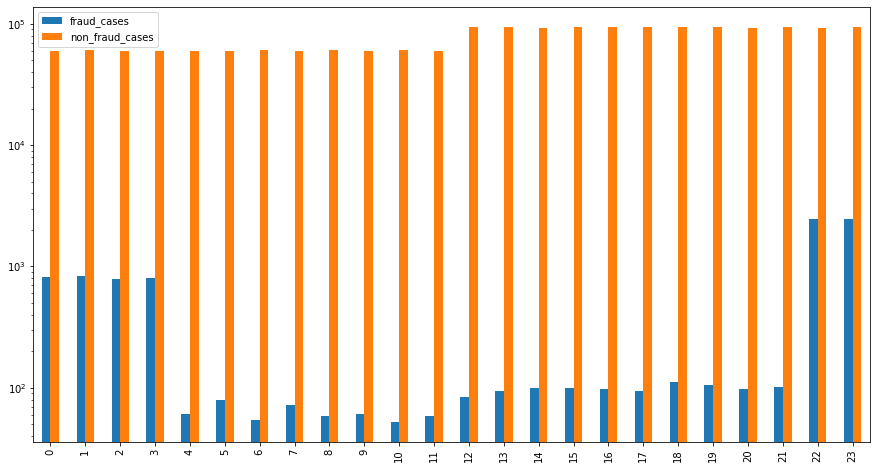

In [16]:
non_fraud_df = combined_df[combined_df.is_fraud == 0]
plot_double_bar(fraud_df, non_fraud_df, 'hour')

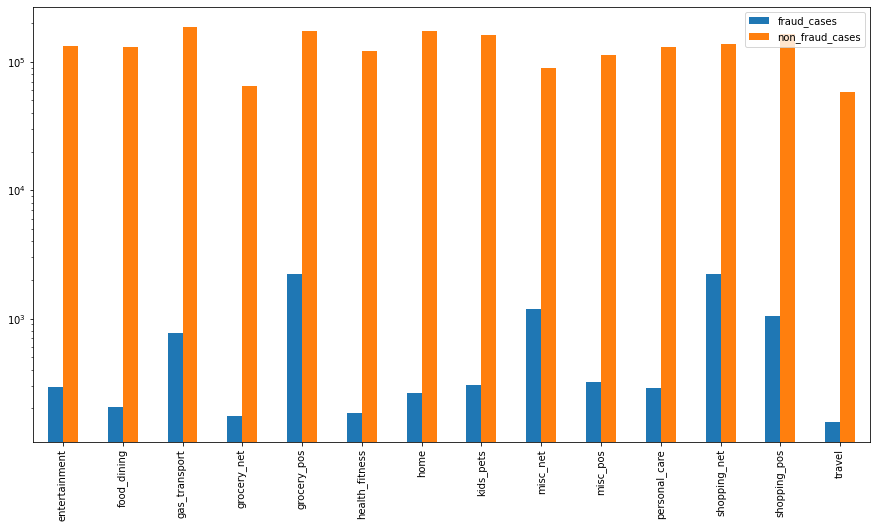

In [17]:
plot_double_bar(fraud_df, non_fraud_df, 'category')

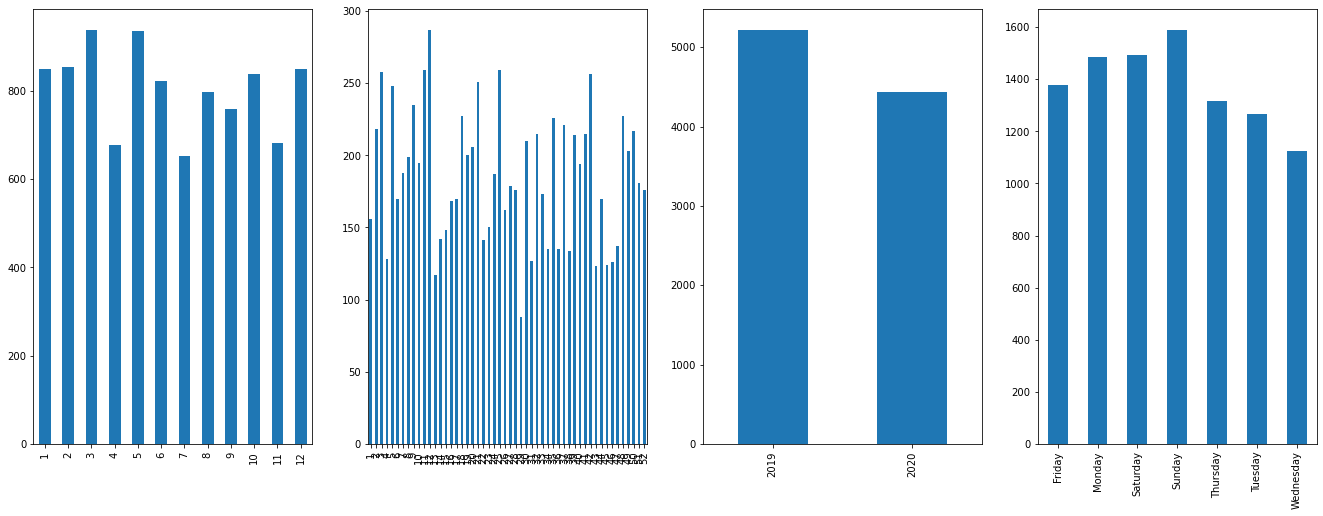

In [18]:
plt.figure(figsize = (23,8))
plt.subplot(141)
fraud_df['month'].value_counts().sort_index().plot(kind = 'bar')
plt.subplot(142)
fraud_df['week'].value_counts().sort_index().plot(kind = 'bar')
plt.subplot(143)
fraud_df['year'].value_counts().sort_index().plot(kind = 'bar')
plt.subplot(144)
fraud_df['day'].value_counts().sort_index().plot(kind = 'bar')

plt.show()

The following two plots show no notable difference or spiked in fraud data, although there seem to be more 

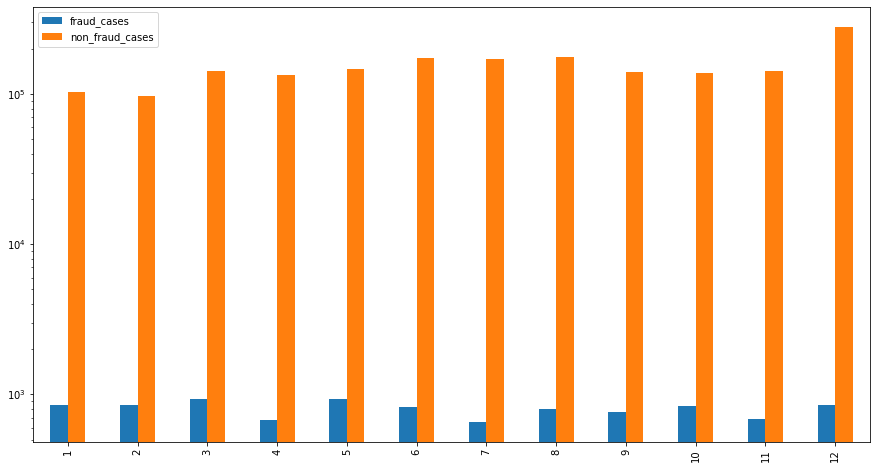

In [19]:
# TODO, fix this, idk, https://stackoverflow.com/questions/48129222/matplotlib-make-plots-in-functions-and-then-add-each-to-a-single-subplot-figure
#plt.figure(figsize = (23,8))
#plt.subplot(121)
plot_double_bar(fraud_df, non_fraud_df, 'month')
#plt.subplot(122)
#plot_double_bar(fraud_df, non_fraud_df, 'year')
#plt.show()
#plt.close('all') 

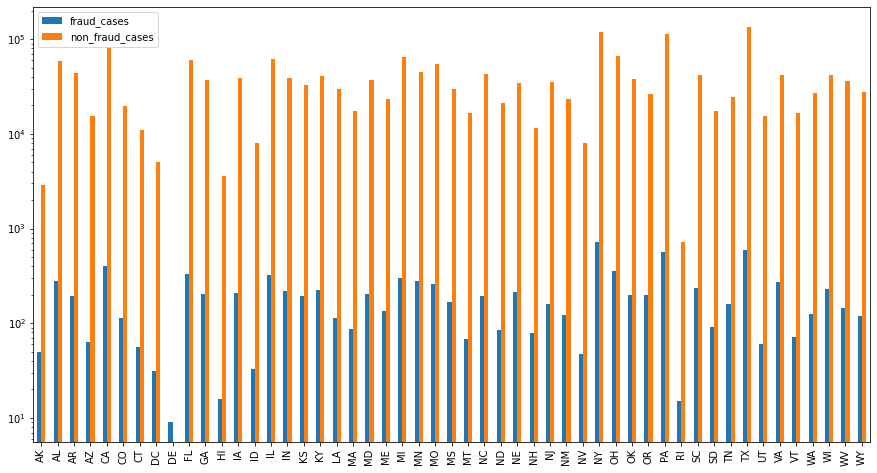

In [20]:
# TODO: diese Graphen hier fixen, maybe nicht als Graphen darstellen
plot_double_bar(fraud_df, non_fraud_df, 'state')

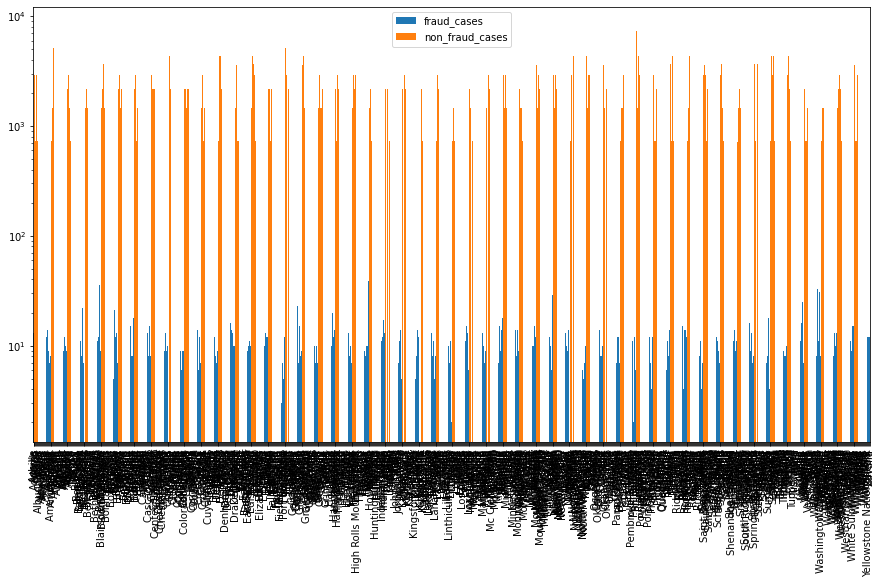

In [21]:
plot_double_bar(fraud_df, non_fraud_df, 'city')

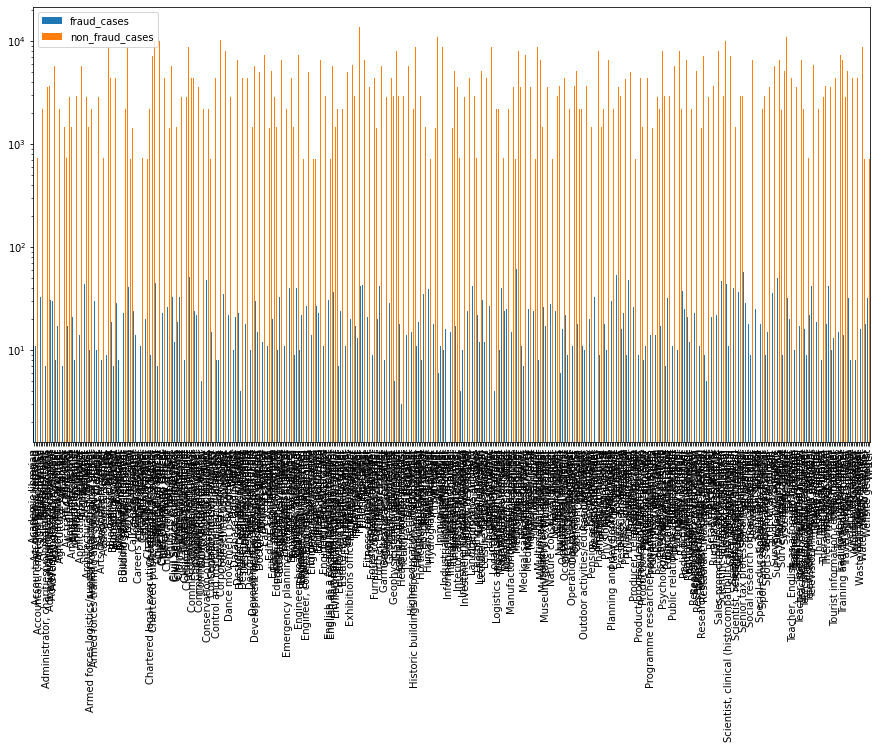

In [22]:
plot_double_bar(fraud_df, non_fraud_df, 'job')

In [23]:
# TODO: plot geographical data here


Oversampling here

AttributeError: 'DataFrame' object has no attribute 'is_fraud'